# random asset exchange model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

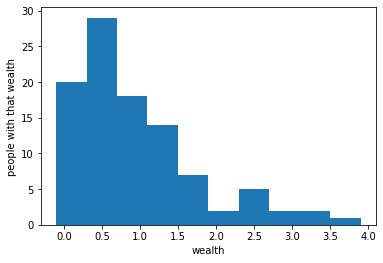

In [2]:
#basic plot
nsteps = 10000
npeople = 100
wealth = np.ones(npeople)
coin = 0.1

for t in range(nsteps):
    p1 = np.random.randint(low = 0, high = npeople)
    p2 = np.random.randint(low = 0, high = npeople)
    if(wealth[p1])>0:
        wealth[p1] -= coin
        wealth[p2] += coin
        
plt.hist(wealth);
plt.xlabel("wealth");
plt.ylabel("people with that wealth");

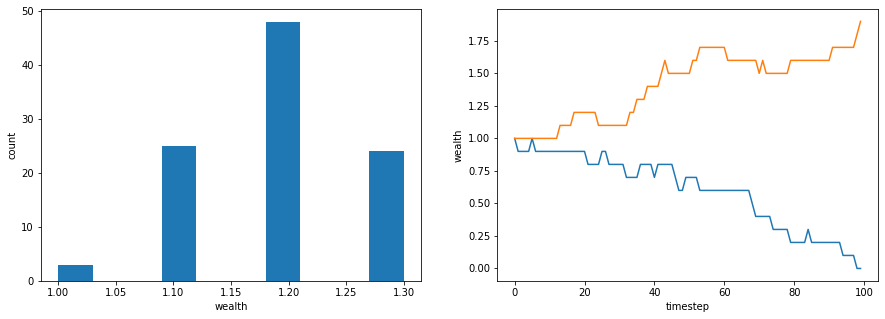

In [4]:
#history
nsteps = 100
npeople = 100
trade_per_step = 10
wealth = np.ones(shape=(nsteps, npeople))
coin = 0.1

for t in range(1, nsteps):
    wealth[t,:] = wealth[t-1,:]
    for i in range(trade_per_step):
        p1 = np.random.randint(low = 0, high = npeople)
        p2 = np.random.randint(low = 0, high = npeople)
        if(wealth[t,p1])>0:
            wealth[t,p1] = wealth[t-1,p1] - coin #taxes in here 
            wealth[t,p2] = wealth[t-1,p2] + coin


plt.figure(figsize=(15,5));
plt.subplot(1,2,1);
plt.hist(wealth[:,0]);
plt.xlabel('wealth');
plt.ylabel('count');

plt.subplot(1,2,2);
#plt.plot(wealth[-1,:]);
poor_one = np.argmin(wealth[-1,:]);
rich_one = np.argmax(wealth[-1,:]);
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
plt.xlabel('timestep');
plt.ylabel('wealth');

#implement taxes for hw
#and maybe inequality 